# `CRO` fitting with CESM2

This tutorial illustrates how to use the `pyCRO` to estimate RO parameters from CESM2

Contact:
 - Sen Zhao (zhaos@hawaii.edu)

## Load library

In [1]:
%config IPCompleter.greedy = True
%matplotlib inline
%config InlineBackend.figure_format='retina'

%load_ext autoreload
%autoreload 2

import os
import sys
    
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

## comment this if you install pyCRO already
sys.path.append(os.path.abspath("../../../"))

import pyCRO

# from pyCRO import RO_fitting, RO_solver, RO_analytic_std, RO_analytic_solver, RO_BWJ, func_mon_std, par_load

## Fitting RO to the CESM2 simulation

### Load observed ENSO timeseries from CESM2

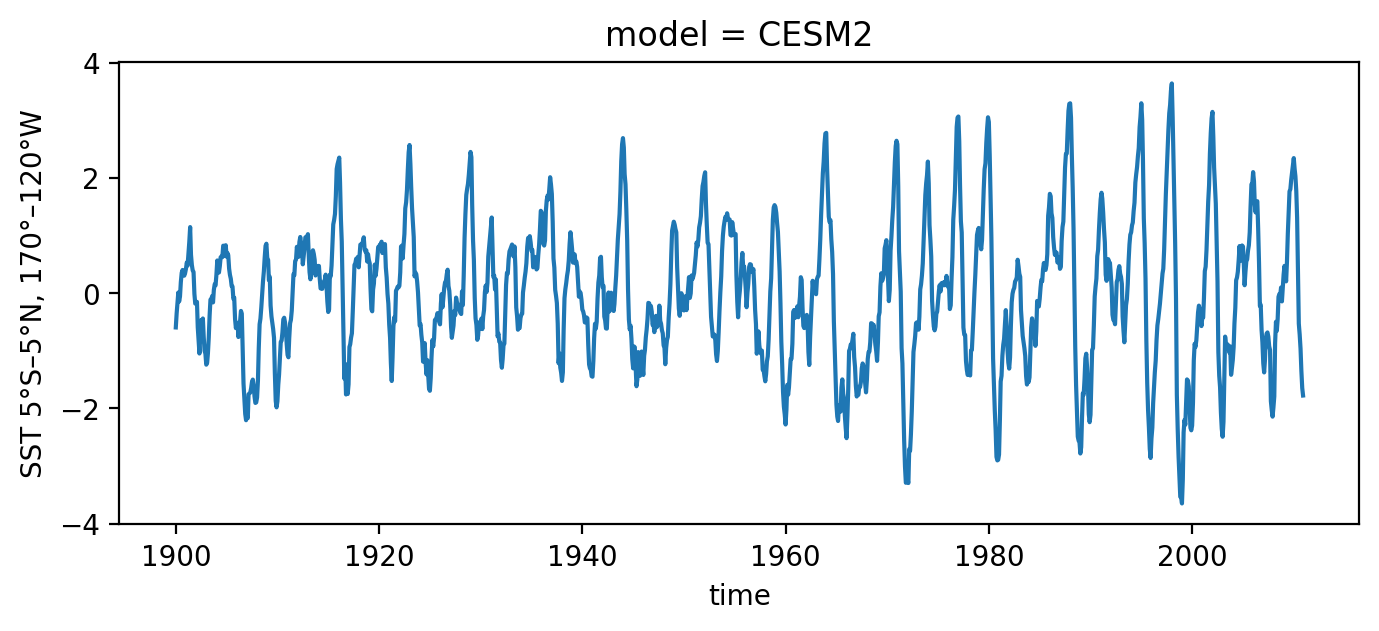

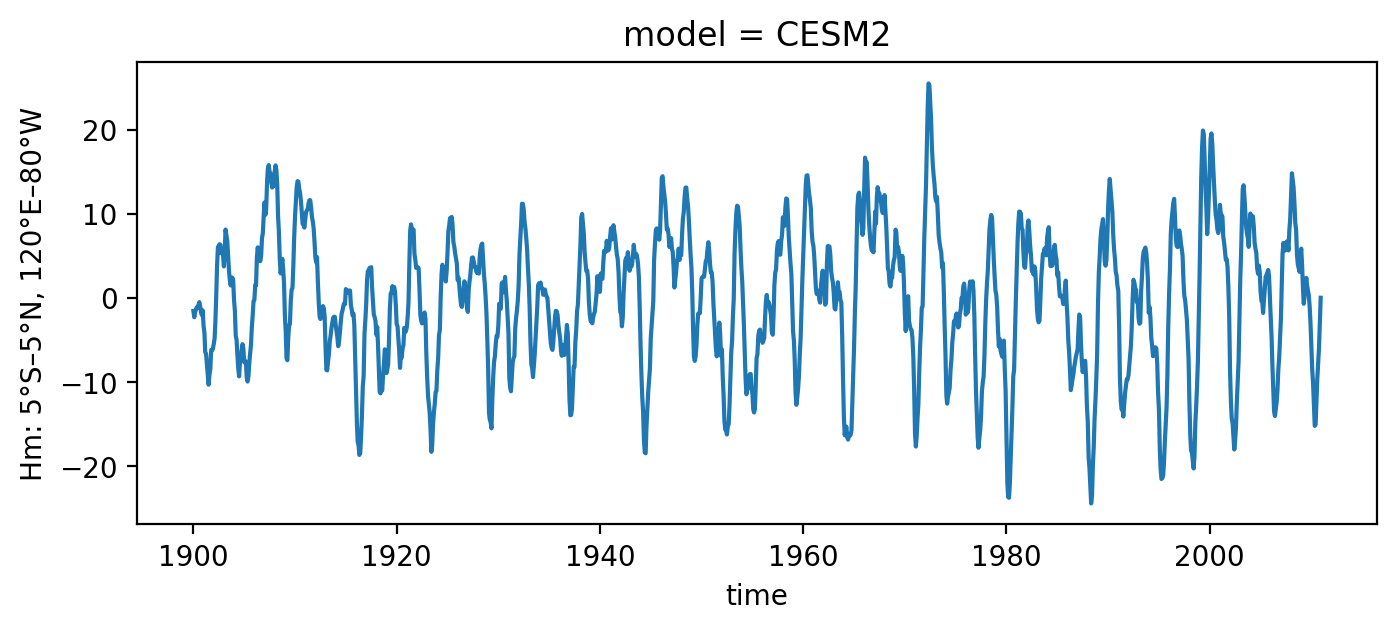

In [2]:
# load observations
file_name = os.path.join(os.getcwd(), "../../../data", "CROdata_timeseries_CMIP6.nc")
xr_ds = xr.open_dataset(file_name).sel(model='CESM2')
T_oras5 = xr_ds['Nino34'][:]
h_oras5 = xr_ds['Hm'][:]
time_oras5 = xr_ds['time'][:]

T_oras5.plot(figsize=(8, 3))
h_oras5.plot(figsize=(8, 3))

### Type Linear-White-Additive

Fit linear RO with white and additive noise 

In [3]:
par_option_T = {"R": 1, "F1": 1, "b_T": 0, "c_T": 0, "d_T": 0}
par_option_h = {"F2": 1, "epsilon": 1, "b_h": 0}
par_option_noise = {"T": "white", "h": "white", "T_type": "additive"}

par_obs_LWA = pyCRO.RO_fitting(T_oras5, h_oras5, par_option_T, par_option_h, par_option_noise)
par_obs_LWA

---------------------------------------------------------------------------------
Welcome to CRO Fitting! Your fitting setups:
---------------------------------------------------------------------------------
 - Data time step is not given, defaulting to: dt = 1.0 months.
 - Time series length: N = len(T)*dt = 1332.0 months.
 - Prescribed terms: {'R': 1, 'F1': 1, 'b_T': 0, 'c_T': 0, 'd_T': 0}. 
                     {'F2': 1, 'epsilon': 1, 'b_h': 0}. 
   0 - Do not prescribe. 
   1 - Prescribe only the annual mean. 
   3 - Prescribe the annual mean and annual seasonality. 
   5 - Prescribe the annual mean, annual seasonality, and semi-annual seasonality.
 - Noise options: {'T': 'white', 'h': 'white', 'T_type': 'additive'}.
 - Fitting method for T and h main equations: None.
Referring to table_default_fitting_method.txt and using LR-F
---------------------------------------------------------------------------------
All steps are successfully completed!
-----------------------------------

{'R': [0.04881091747701985],
 'F1': [0.024283288277694492],
 'F2': [1.3178655726966424],
 'epsilon': [0.11864589240712925],
 'b_T': [],
 'c_T': [],
 'd_T': [],
 'b_h': [],
 'sigma_T': [0.24270275808076133],
 'sigma_h': [1.2333409188611724],
 'B': [],
 'm_T': [],
 'm_h': [],
 'n_T': [1],
 'n_h': [1],
 'n_g': [2]}

### Type Seasonal-Linear-White-Additive
Fit seasonal linear RO with white and additive noise

In [4]:
par_option_T = {"R": 3, "F1": 3, "b_T": 0, "c_T": 0, "d_T": 0}
par_option_h = {"F2": 3, "epsilon": 3, "b_h": 0}
par_option_noise = {"T": "white", "h": "white", "T_type": "additive"}

par_obs_SLWA = pyCRO.RO_fitting(T_oras5, h_oras5, par_option_T, par_option_h, par_option_noise)
par_obs_SLWA

---------------------------------------------------------------------------------
Welcome to CRO Fitting! Your fitting setups:
---------------------------------------------------------------------------------
 - Data time step is not given, defaulting to: dt = 1.0 months.
 - Time series length: N = len(T)*dt = 1332.0 months.
 - Prescribed terms: {'R': 3, 'F1': 3, 'b_T': 0, 'c_T': 0, 'd_T': 0}. 
                     {'F2': 3, 'epsilon': 3, 'b_h': 0}. 
   0 - Do not prescribe. 
   1 - Prescribe only the annual mean. 
   3 - Prescribe the annual mean and annual seasonality. 
   5 - Prescribe the annual mean, annual seasonality, and semi-annual seasonality.
 - Noise options: {'T': 'white', 'h': 'white', 'T_type': 'additive'}.
 - Fitting method for T and h main equations: None.
Referring to table_default_fitting_method.txt and using LR-F
---------------------------------------------------------------------------------
All steps are successfully completed!
-----------------------------------

{'R': [0.06821355461159952, 0.11815205611540278, -2.2264238967859242],
 'F1': [0.019431596621856555, 0.011232682934059287, -0.7066440257470248],
 'F2': [1.291632870677509, 0.7887253573047012, 0.7123461019220622],
 'epsilon': [0.14311725144916565, 0.021279778962859812, 1.0243072860145828],
 'b_T': [],
 'c_T': [],
 'd_T': [],
 'b_h': [],
 'sigma_T': [0.21860827658456902],
 'sigma_h': [1.0861175365249358],
 'B': [],
 'm_T': [],
 'm_h': [],
 'n_T': [1],
 'n_h': [1],
 'n_g': [2]}

### Type Seasonal-Nonlinear-White-Additive
Fit seasonal nonlinear RO with white and additive noise

In [5]:
par_option_T = {"R": 3, "F1": 3, "b_T": 3, "c_T": 3, "d_T": 3}
par_option_h = {"F2": 3, "epsilon": 3, "b_h": 3}
par_option_noise = {"T": "white", "h": "white", "T_type": "additive"}

par_obs_SNWA = pyCRO.RO_fitting(T_oras5, h_oras5, par_option_T, par_option_h, par_option_noise)
par_obs_SNWA

---------------------------------------------------------------------------------
Welcome to CRO Fitting! Your fitting setups:
---------------------------------------------------------------------------------
 - Data time step is not given, defaulting to: dt = 1.0 months.
 - Time series length: N = len(T)*dt = 1332.0 months.
 - Prescribed terms: {'R': 3, 'F1': 3, 'b_T': 3, 'c_T': 3, 'd_T': 3}. 
                     {'F2': 3, 'epsilon': 3, 'b_h': 3}. 
   0 - Do not prescribe. 
   1 - Prescribe only the annual mean. 
   3 - Prescribe the annual mean and annual seasonality. 
   5 - Prescribe the annual mean, annual seasonality, and semi-annual seasonality.
 - Noise options: {'T': 'white', 'h': 'white', 'T_type': 'additive'}.
 - Fitting method for T and h main equations: None.
Referring to table_default_fitting_method.txt and using LR-F
---------------------------------------------------------------------------------
All steps are successfully completed!
-----------------------------------

{'R': [0.09707048406918742, 0.11012442769298772, -2.0306432694917085],
 'F1': [0.021277834303133937, 0.00997545116054638, -0.8327255009690342],
 'F2': [1.2907375505480336, 0.7901917793505685, 0.7125171172391725],
 'epsilon': [0.1445065222649436, 0.022332186589528364, 1.0951424359162376],
 'b_T': [0.02425479532652171, 0.01706492738653012, -0.532527517237404],
 'c_T': [0.0076096798999189365, 0.008759968631317429, -0.7409628684661591],
 'd_T': [0.005719540545050865, 0.0019814927173935734, -0.5442851394087933],
 'b_h': [0.006545379318198074, 0.03422975970193124, 2.0493931259479363],
 'sigma_T': [0.21299186191318356],
 'sigma_h': [1.08356377862314],
 'B': [],
 'm_T': [],
 'm_h': [],
 'n_T': [1],
 'n_h': [1],
 'n_g': [2]}

### Type Seasonal-Nonlinear-Red-Additive
Fit seasonal nonlinear RO with red and additive noise

In [6]:
par_option_T = {"R": 3, "F1": 3, "b_T": 3, "c_T": 3, "d_T": 3}
par_option_h = {"F2": 3, "epsilon": 3, "b_h": 3}
par_option_noise = {"T": "red", "h": "red", "T_type": "additive"}

par_obs_SNRA = pyCRO.RO_fitting(T_oras5, h_oras5, par_option_T, par_option_h, par_option_noise)
par_obs_SNRA

---------------------------------------------------------------------------------
Welcome to CRO Fitting! Your fitting setups:
---------------------------------------------------------------------------------
 - Data time step is not given, defaulting to: dt = 1.0 months.
 - Time series length: N = len(T)*dt = 1332.0 months.
 - Prescribed terms: {'R': 3, 'F1': 3, 'b_T': 3, 'c_T': 3, 'd_T': 3}. 
                     {'F2': 3, 'epsilon': 3, 'b_h': 3}. 
   0 - Do not prescribe. 
   1 - Prescribe only the annual mean. 
   3 - Prescribe the annual mean and annual seasonality. 
   5 - Prescribe the annual mean, annual seasonality, and semi-annual seasonality.
 - Noise options: {'T': 'red', 'h': 'red', 'T_type': 'additive'}.
 - Fitting method for T and h red noises: ARn.
   This option is defined internally within fit.py.
   Options available are: LR or AR1 or ARn.
 - Fitting method for T and h main equations: None.
Referring to table_default_fitting_method.txt and using LR-F
----------------

{'R': [0.09707048406918742, 0.11012442769298772, -2.0306432694917085],
 'F1': [0.021277834303133937, 0.00997545116054638, -0.8327255009690342],
 'F2': [1.2907375505480336, 0.7901917793505685, 0.7125171172391725],
 'epsilon': [0.1445065222649436, 0.022332186589528364, 1.0951424359162376],
 'b_T': [0.02425479532652171, 0.01706492738653012, -0.532527517237404],
 'c_T': [0.0076096798999189365, 0.008759968631317429, -0.7409628684661591],
 'd_T': [0.005719540545050865, 0.0019814927173935734, -0.5442851394087933],
 'b_h': [0.006545379318198074, 0.03422975970193124, 2.0493931259479363],
 'sigma_T': [0.21299186191318356],
 'sigma_h': [1.08356377862314],
 'B': [],
 'm_T': [1.48264737187866],
 'm_h': [1.420543455816845],
 'n_T': [0],
 'n_h': [0],
 'n_g': [2]}

### Visualize the deterministic RO parameters

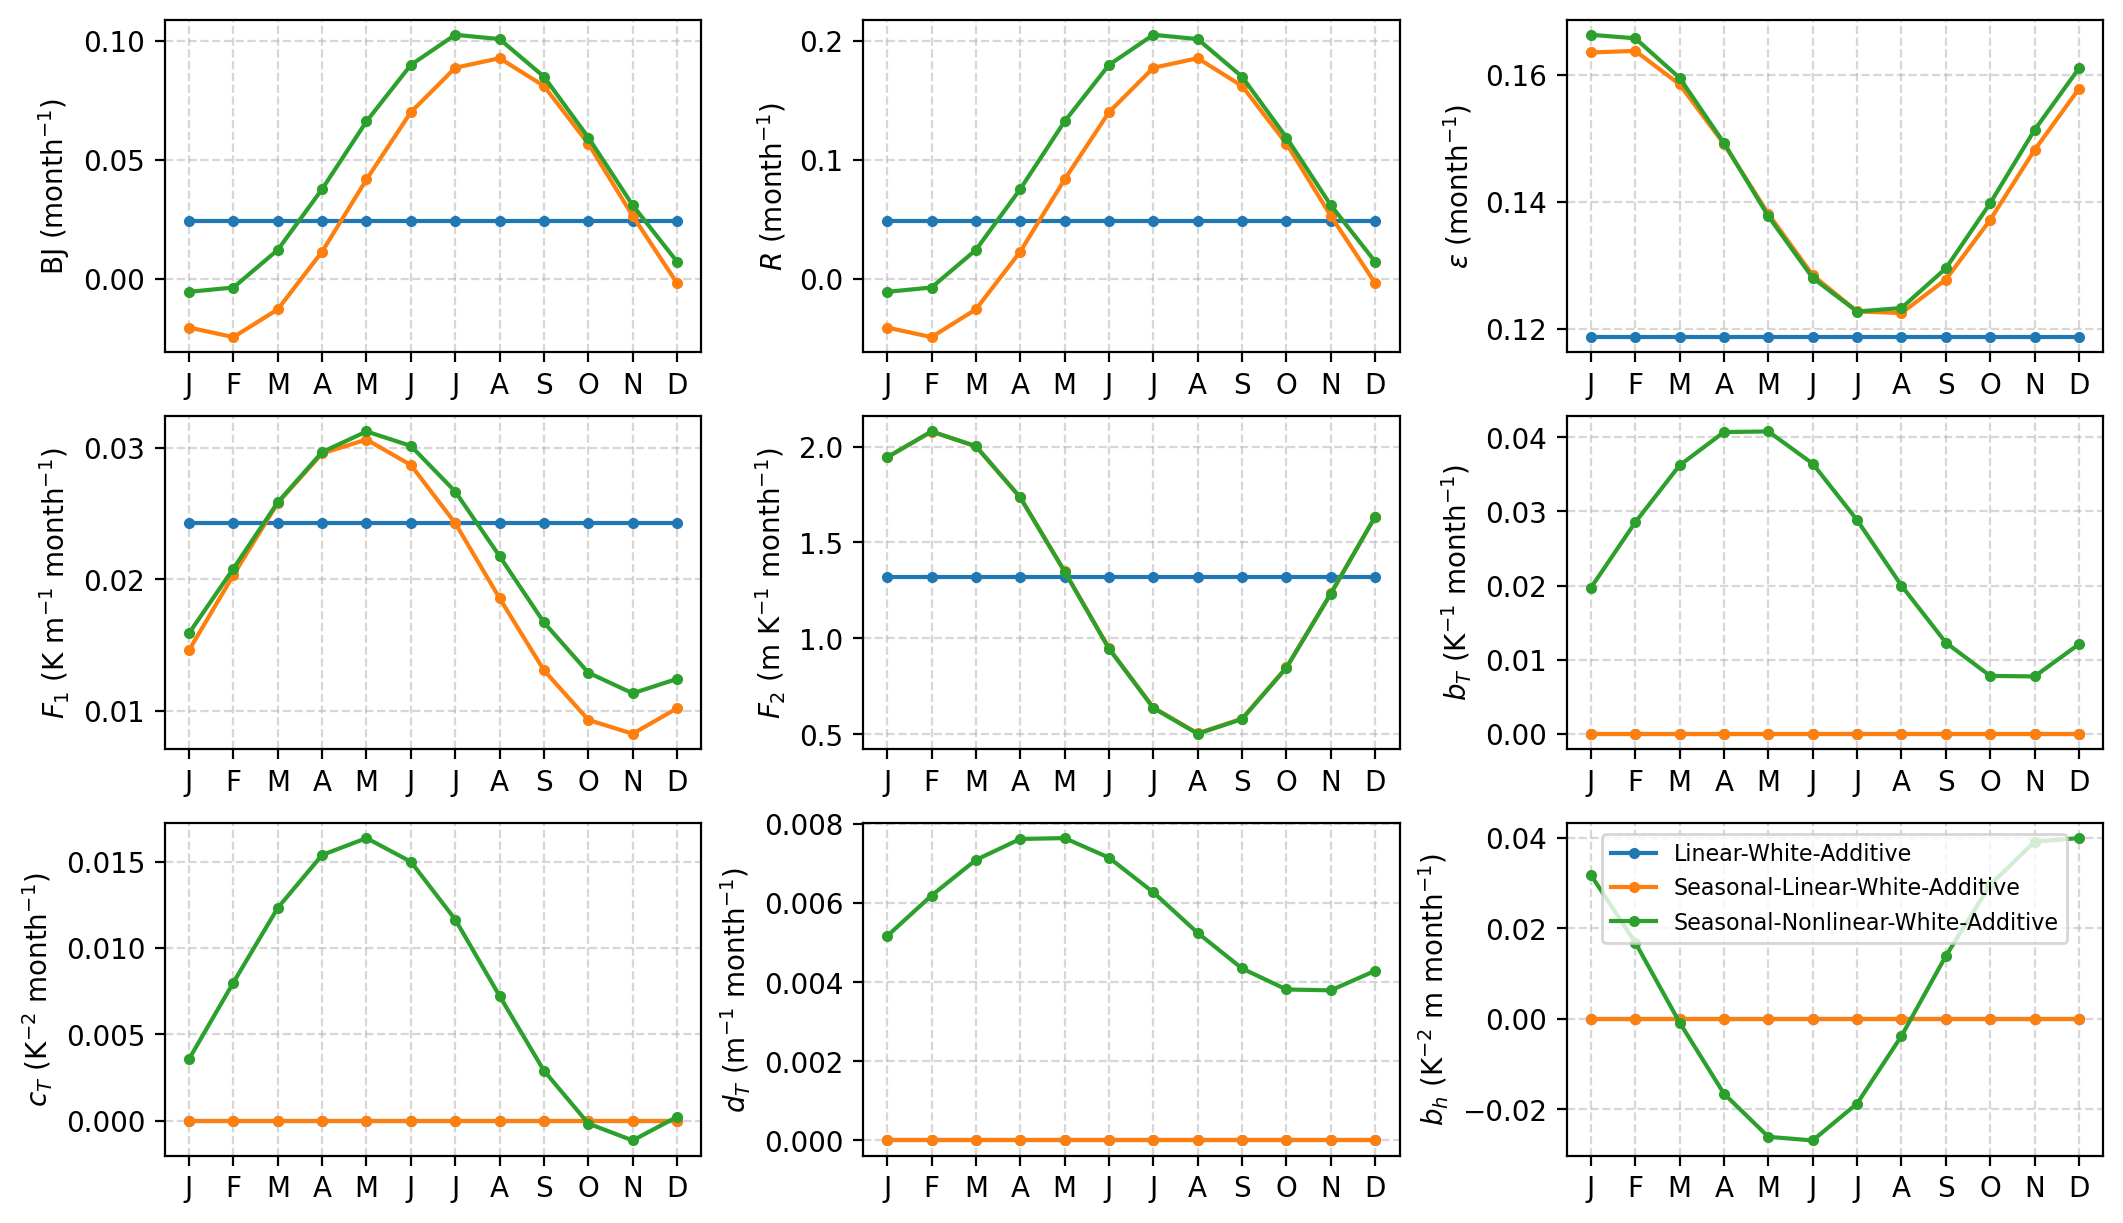

In [7]:
axes = pyCRO.plot_RO_par(par_obs_LWA, label='Linear-White-Additive', ncol=3)
axes = pyCRO.plot_RO_par(par_obs_SLWA, label='Seasonal-Linear-White-Additive', ncol=3, ax=axes)
axes = pyCRO.plot_RO_par(par_obs_SNWA, label='Seasonal-Nonlinear-White-Additive', ncol=3, ax=axes)
axes[-1].legend(fontsize=8)

## Simulating ENSO with observed RO parameters

In [8]:
def CRO_simulate(par, IC=[0, 0], N=12*200, NE=100, verbose=False):
    """
        CRO simulation (solver) with defined parameters

            default: 100 member with 200 yrs each member
    """
    T_out, h_out, noise_out = pyCRO.RO_solver(par, IC=IC, N=N, NE=NE, verbose=verbose)
    xtime = xr.date_range('0001-01', periods=N, freq = 'MS', use_cftime=True)
    member = np.arange(0, NE, step=1)
    T_ds = xr.DataArray(T_out, dims={'time', 'member'}, coords={'time': xtime, 'member': member})
    h_ds = xr.DataArray(h_out, dims={'time', 'member'}, coords={'time': xtime, 'member': member})
    RO_ds = xr.Dataset({'Nino34': T_ds, 'Hm': h_ds})
    return RO_ds


### simulation with LWA type

In [9]:
%%time
RO_obs_LWA = CRO_simulate(par_obs_LWA, verbose=True)

---------------------------------------------------------------------------------
Welcome to the CRO Solver! Your simulation setup is as follows:
---------------------------------------------------------------------------------
 - Total simulation length: N = 2400 months
 - Number of ensemble members: NE = 100
 - Numerical integration time step: dt = 0.1 months (default: 0.1)
 - Data output interval: saveat = 1.0 months (default: 1.0)
 - Initial conditions: IC = [T0, h0] = [0, 0]
 - Input parameters have the expected shapes.
 - 'n_T' = 1: White noise forcing in T; 'm_T' ignored.
 - 'n_h' = 1: White noise forcing in h; 'm_h' ignored.
 - 'n_g' = 2: Additive noise is used in the T equation; 'B' is ignored.
 - Numerical integration method: NM = 'EH' (Euler–Heun method; default)
 - Data saving method: savemethod = sampling (default)
 - External forcing is not given, therefore using
   EF = {'E_T': [0.0, 0.0, 0.0, 0.0, 0.0], 'E_h': [0.0, 0.0, 0.0, 0.0, 0.0]}.
 - noise_custom = None: System-g

In [10]:
%%time

RO_obs_SLWA = CRO_simulate(par_obs_SLWA, verbose=False)
RO_obs_SNWA = CRO_simulate(par_obs_SNWA, verbose=False)
RO_obs_SNRA = CRO_simulate(par_obs_SNRA, verbose=False)


CPU times: user 6.57 s, sys: 72.6 ms, total: 6.64 s
Wall time: 6.68 s


calculation of seasonal standard deivation

In [11]:
%%time

seaSD_obs = xr_ds.groupby('time.month').std('time')
seaSD_obsRO_LWA = RO_obs_LWA.groupby('time.month').std('time')
seaSD_obsRO_SLWA = RO_obs_SLWA.groupby('time.month').std('time')
seaSD_obsRO_SNWA = RO_obs_SNWA.groupby('time.month').std('time')
seaSD_obsRO_SNRA = RO_obs_SNRA.groupby('time.month').std('time')


CPU times: user 45.2 ms, sys: 10.1 ms, total: 55.4 ms
Wall time: 55.6 ms


### Effect of seasonal cycle of RO linear parameters

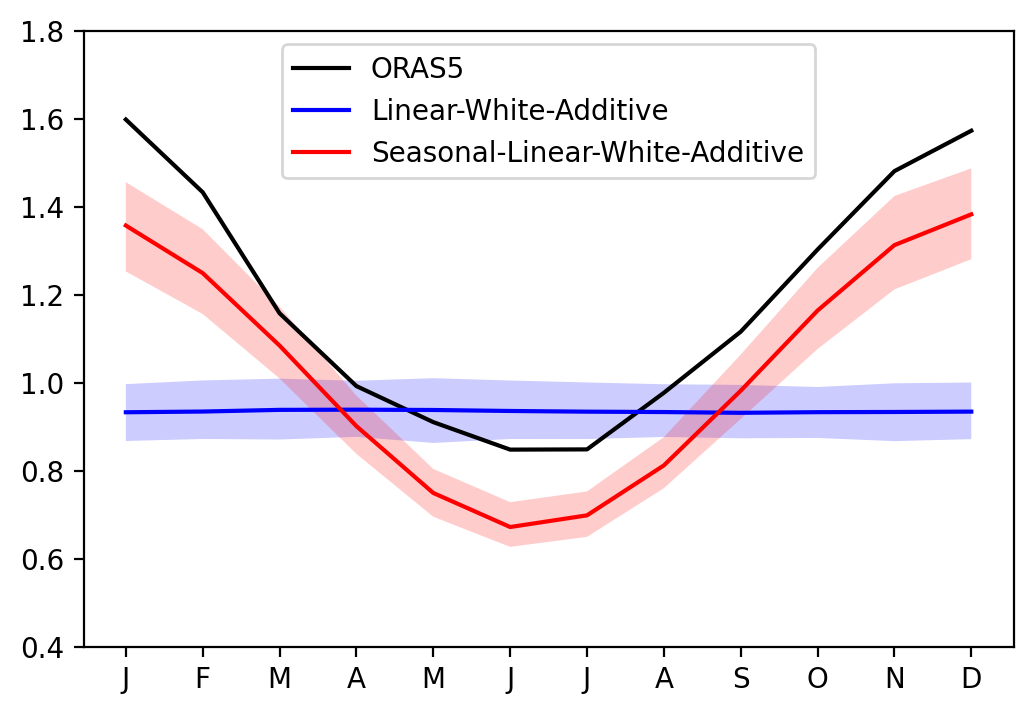

In [15]:
sel_var = 'Nino34'

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.plot(seaSD_obs.month, seaSD_obs[sel_var], c='k', label='ORAS5')

ax.plot(seaSD_obsRO_LWA.month, seaSD_obsRO_LWA[sel_var].mean('member'), c='blue', label='Linear-White-Additive')
ax.fill_between(seaSD_obsRO_LWA.month, seaSD_obsRO_LWA[sel_var].quantile(0.1, dim='member'), seaSD_obsRO_LWA[sel_var].quantile(0.9, dim='member'), fc='blue', alpha=0.2)

ax.plot(seaSD_obsRO_SLWA.month, seaSD_obsRO_SLWA[sel_var].mean('member'), c='red', label='Seasonal-Linear-White-Additive')
ax.fill_between(seaSD_obsRO_SLWA.month, seaSD_obsRO_SLWA[sel_var].quantile(0.1, dim='member'), seaSD_obsRO_SLWA[sel_var].quantile(0.9, dim='member'), fc='red', alpha=0.2)

ax.set_xticks(range(1, 13))
ax.set_xticklabels(["J","F","M","A","M","J","J","A","S","O","N","D"])
ax.set_ylim([0.4, 1.8])
ax.legend()


### Effect of RO nonlinear parameters

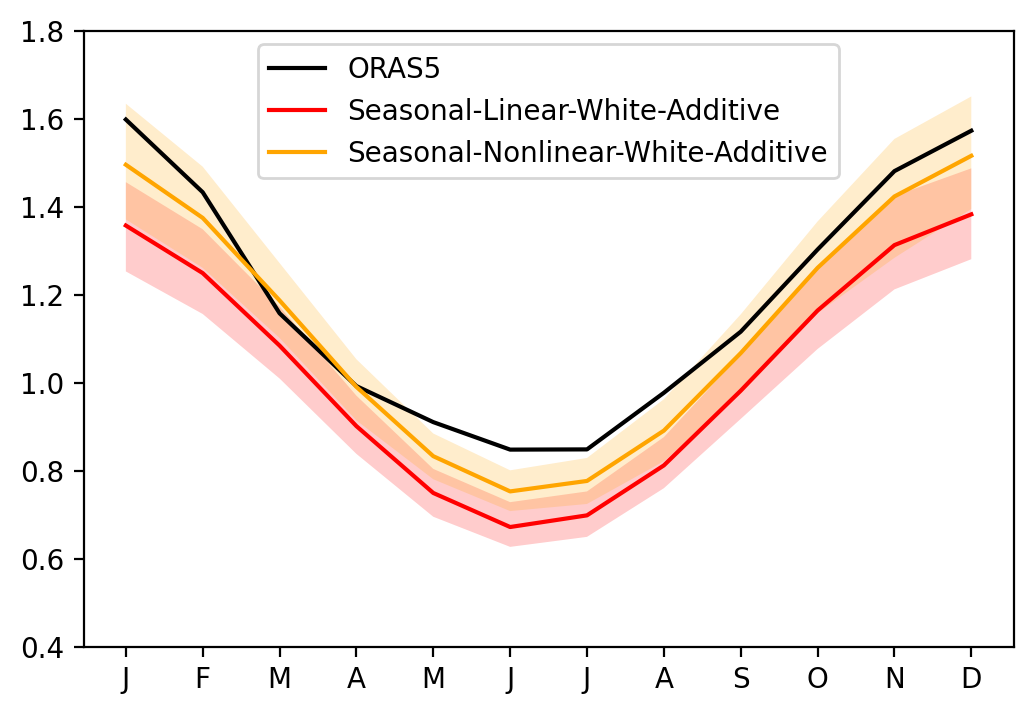

In [16]:
sel_var = 'Nino34'

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.plot(seaSD_obs.month, seaSD_obs[sel_var], c='k', label='ORAS5')

ax.plot(seaSD_obsRO_SLWA.month, seaSD_obsRO_SLWA[sel_var].mean('member'), c='red', label='Seasonal-Linear-White-Additive')
ax.fill_between(seaSD_obsRO_SLWA.month, seaSD_obsRO_SLWA[sel_var].quantile(0.1, dim='member'), seaSD_obsRO_SLWA[sel_var].quantile(0.9, dim='member'), fc='red', alpha=0.2)

ax.plot(seaSD_obsRO_SNWA.month, seaSD_obsRO_SNWA[sel_var].mean('member'), c='orange', label='Seasonal-Nonlinear-White-Additive')
ax.fill_between(seaSD_obsRO_SNWA.month, seaSD_obsRO_SNWA[sel_var].quantile(0.1, dim='member'), seaSD_obsRO_SNWA[sel_var].quantile(0.9, dim='member'), fc='orange', alpha=0.2)

ax.set_xticks(range(1, 13))
ax.set_xticklabels(["J","F","M","A","M","J","J","A","S","O","N","D"])
ax.set_ylim([0.4, 1.8])
ax.legend()

### Red noise vs White noise

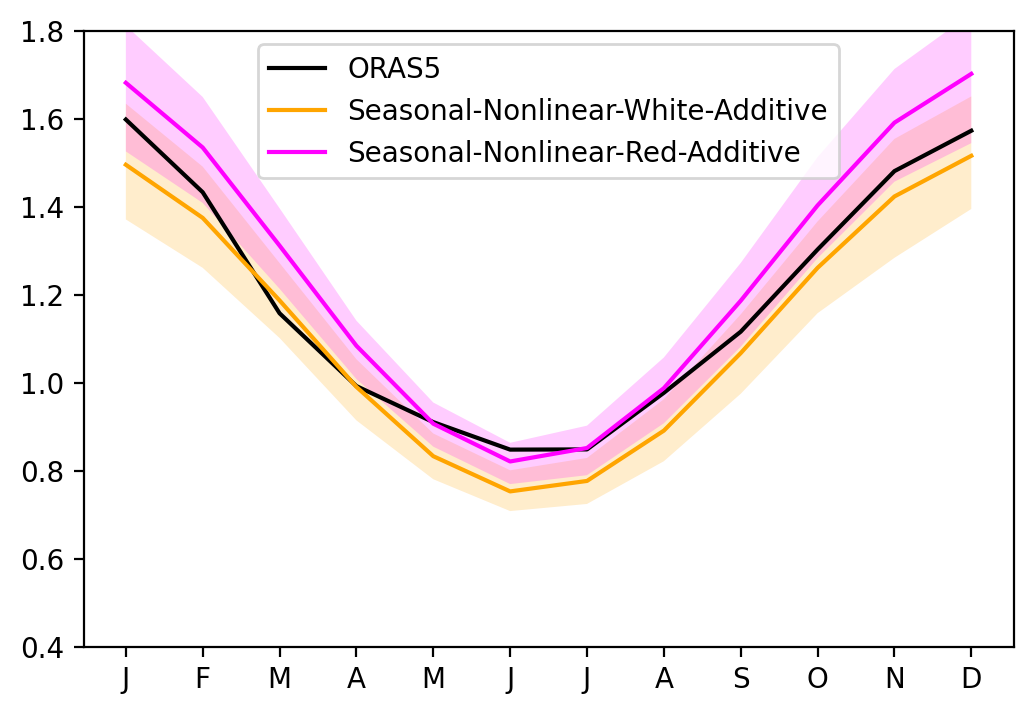

In [17]:
sel_var = 'Nino34'

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.plot(seaSD_obs.month, seaSD_obs[sel_var], c='k', label='ORAS5')

ax.plot(seaSD_obsRO_SNWA.month, seaSD_obsRO_SNWA[sel_var].mean('member'), c='orange', label='Seasonal-Nonlinear-White-Additive')
ax.fill_between(seaSD_obsRO_SNWA.month, seaSD_obsRO_SNWA[sel_var].quantile(0.1, dim='member'), seaSD_obsRO_SNWA[sel_var].quantile(0.9, dim='member'), fc='orange', alpha=0.2)

ax.plot(seaSD_obsRO_SNRA.month, seaSD_obsRO_SNRA[sel_var].mean('member'), c='magenta', label='Seasonal-Nonlinear-Red-Additive')
ax.fill_between(seaSD_obsRO_SNRA.month, seaSD_obsRO_SNRA[sel_var].quantile(0.1, dim='member'), seaSD_obsRO_SNRA[sel_var].quantile(0.9, dim='member'), fc='magenta', alpha=0.2)

ax.set_xticks(range(1, 13))
ax.set_xticklabels(["J","F","M","A","M","J","J","A","S","O","N","D"])
ax.set_ylim([0.4, 1.8])
ax.legend()